## Seaborn 画图

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# sns.set_style("whitegrid")
tips = sns.load_dataset("tips")

In [2]:
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


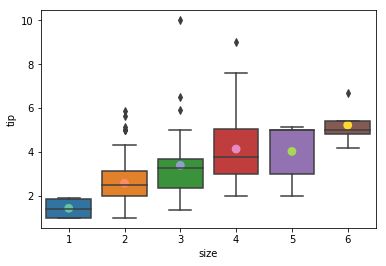

In [3]:
ax = sns.boxplot(x="size", y="tip", data=tips)
ax = sns.pointplot(x="size",y='tip',data=tips,palette="Set2",errwidth=0)

In [4]:
# 画图方法

def compare_plot(*data):
    f, axes = plt.subplots(len(set(merge_csv1['chr']))+1, 2, figsize=(7, 7), sharex=True)
    sns.despine(left=True)

    for n,da in enumerate(data):
        sns.distplot(da[da['pool']=='POOL=1']['depth'], kde=True,label='pool1-all',ax=axes[0,n])
        sns.distplot(da[da['pool']=='POOL=2']['depth'], kde=True,label='pool2-all',ax=axes[0,n])    
        axes[0,n].legend()
        for j,i in enumerate(set(da['chr'])):
            sns.distplot(da[(da['pool']=='POOL=1') & (da['chr']==i)]['depth'], 
                              kde=True,label='pool1-chr{}'.format(i),ax=axes[j+1,n])
            sns.distplot(da[(da['pool']=='POOL=2') &(da['chr']==i)]['depth'], 
                              kde=True,label='pool2-chr{}'.format(i),ax=axes[j+1,n])
            axes[j+1,n].legend()

第一列是分pool进行标准化，第二列为不分pool


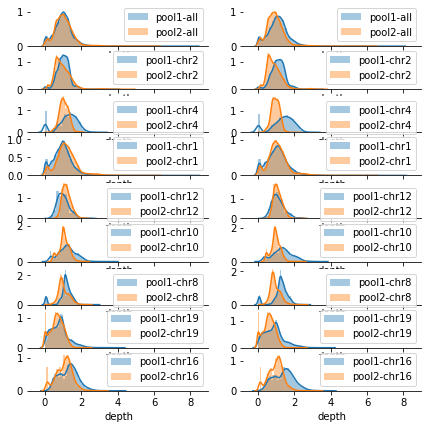

In [5]:
merge_csv1 = pd.read_csv('./demo_data/twopoolmerge.csv')
merge_csv1.columns=['tag','loc','pool','depth']
merge_csv1['chr-temp'] = merge_csv1['loc'].str.split(':')
merge_csv1['chr'] = merge_csv1['chr-temp'].str.get(0)
# print(merge_csv[''])

merge_csv2 = pd.read_csv('./demo_data/onePool.csv')
merge_csv2.columns=['tag','loc','depth','pool']
merge_csv2['chr-temp'] = merge_csv2['loc'].str.split(':')
merge_csv2['chr'] = merge_csv2['chr-temp'].str.get(0)
print('第一列是分pool进行标准化，第二列为不分pool')
compare_plot(merge_csv1,merge_csv2)

Text(1.5,5,'LDLR')

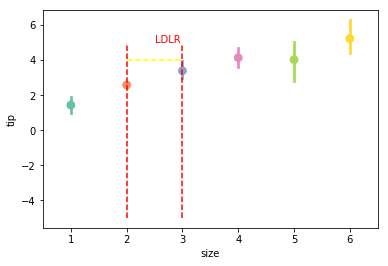

In [6]:
ax = sns.pointplot(x="size",y='tip',data=tips,palette="Set2")
ax.plot([1,1],[-5,5],'--',color='red')
ax.plot([2,2],[-5,5],'--',color='red')
ax.plot([1,2],[4,4],'--',color='yellow')
ax.text(x=1.5,y=5,s='LDLR',color='red')

## Draw pdf or density

In [7]:
def draw_density(data,title,value):
    ax=sns.distplot(data[value],kde=True)
    ax.set_title(title)
    fig = ax.get_figure()
    fig.savefig('./demo_data/hist.png') 

        chr       loc     depth
0  1.582315  0.717695 -0.236007
1 -2.138186  1.745882 -2.336167
2  1.494964  0.626620  0.933739
3 -0.537261  0.395981 -0.230502
4 -0.462672 -0.040314 -2.632566


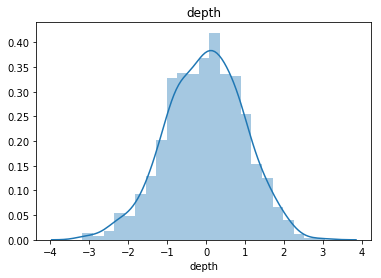

In [8]:
import numpy as np
data=pd.DataFrame(np.random.normal(0,1,(1000,3)),columns=['chr','loc','depth'])
print(data.head())
draw_density(data,'depth','depth')

In [17]:
import statsmodels.api as sm
data=pd.DataFrame(np.random.normal(0,1,(10000,4)),columns=['C','CHH','CG','CHG'])
ecdf = sm.distributions.ECDF(data['C'])
x = np.linspace(min(data['C']), max(data['C']))
y1 = ecdf(x)
ecdf = sm.distributions.ECDF(data['CHH'])
y2 = ecdf(x)
print(y1,y2)

[1.000e-04 1.000e-04 1.000e-04 2.000e-04 3.000e-04 8.000e-04 1.600e-03
 2.600e-03 3.600e-03 5.600e-03 8.600e-03 1.250e-02 1.830e-02 2.600e-02
 3.750e-02 5.220e-02 7.000e-02 9.220e-02 1.209e-01 1.531e-01 1.897e-01
 2.325e-01 2.846e-01 3.399e-01 3.970e-01 4.585e-01 5.200e-01 5.785e-01
 6.390e-01 6.945e-01 7.445e-01 7.900e-01 8.293e-01 8.651e-01 8.953e-01
 9.193e-01 9.404e-01 9.557e-01 9.670e-01 9.767e-01 9.846e-01 9.909e-01
 9.934e-01 9.956e-01 9.968e-01 9.982e-01 9.990e-01 9.994e-01 9.997e-01
 1.000e+00] [0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.000e-04 6.000e-04 1.800e-03
 2.500e-03 3.800e-03 6.300e-03 8.900e-03 1.320e-02 1.890e-02 2.680e-02
 3.740e-02 5.300e-02 6.890e-02 9.030e-02 1.153e-01 1.482e-01 1.840e-01
 2.288e-01 2.840e-01 3.373e-01 3.969e-01 4.518e-01 5.127e-01 5.732e-01
 6.337e-01 6.888e-01 7.394e-01 7.839e-01 8.247e-01 8.610e-01 8.916e-01
 9.162e-01 9.361e-01 9.532e-01 9.680e-01 9.777e-01 9.838e-01 9.893e-01
 9.920e-01 9.944e-01 9.957e-01 9.976e-01 9.988e-01 9.990e-01 9.99